In [92]:
import numpy as np
import pandas as pd
import math


df = pd.read_csv("data/df_b_processed.csv")
df = df.drop_duplicates()



df.drop('hours',axis=1)



def local_businesses(dataset, latitude, longitude, miles):
    # latitude and longitude define the center of the station, miles designates 
    # how big of a circle/area you want to draw around the station
    rows=[]
    for index in range(len(dataset)):
        lat=dataset.loc[index]['latitude']
        long=dataset.loc[index]['longitude']
        distance = math.hypot(lat-latitude,long-longitude)
        if distance < miles/69:
            rows.append(dataset.iloc[index])
    return pd.DataFrame(rows).reset_index(drop=True)
df_located = (local_businesses(df,40.02,-75.16,1))
df_located.head()
# print(len(df_located))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,s_ypQXJm1d94PfmY6JLzRA,Bargain Thrift Center,5245 Germantown Ave,Philadelphia,PA,19144.0,40.032042,-75.167607,4.5,19,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Thrift Stores, Shopping","{'Monday': '9:30-18:0', 'Tuesday': '9:30-18:0'..."
1,gBaiZpCFNEx0gIJQrHWT5w,Elite Flooring Installations,1344 W Hunting Park Ave,Philadelphia,PA,19140.0,40.016561,-75.148802,4.5,7,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Carpet Cleaning, Carpeting, Local Services, Fl...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '..."
2,rBIwGqpV2CKq8UBJ5SLSOQ,US Post Office,"5209 Greene St, Ste 1",Philadelphia,PA,19144.0,40.029906,-75.168447,1.0,28,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Post Offices...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
3,f88P1gIbRpRzsYAHj9hGdA,Sid Booker's Shrimp,4600 N Broad St,Philadelphia,PA,19140.0,40.023383,-75.148359,3.5,59,1,"{'RestaurantsReservations': 'False', 'Business...","Restaurants, Food, Seafood","{'Monday': '12:0-2:0', 'Tuesday': '12:0-2:0', ..."
4,KnyuQ1D7QE7X8eMk8T3kTA,Tasties,5241 Germantown Ave,Philadelphia,PA,19144.0,40.031731,-75.167799,2.5,63,1,"{'BusinessAcceptsCreditCards': 'False', 'Outdo...","Soul Food, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."


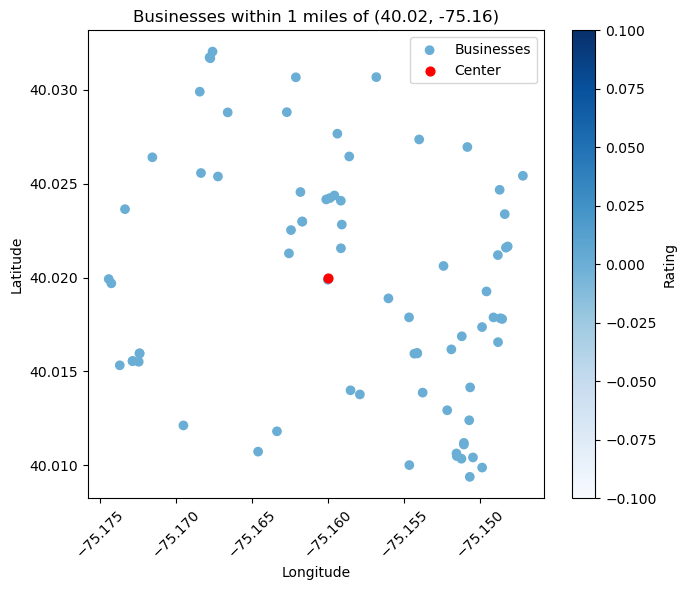

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_businesses(df_local,latitude, longitude, miles):
    if 'rating' not in df_local.columns:
        df_local['rating']=0.0
    df_local['rating']=df_local['rating'].fillna(0.0)   
    ratings = df_local['rating'] 
    norm = (ratings -ratings.min())/(ratings.max()-ratings.min()+1e-10)#####  
    
    fig,ax = plt.subplots(figsize=(7,6))
    scatter = ax.scatter(df_local['longitude'],df_local['latitude'],c=norm,cmap='Blues',label='Businesses')
    ax.scatter(x=longitude,y=latitude,color='red',marker='o',s=40,label = 'Center')
    fig.colorbar(scatter,label='Rating')
    ax.tick_params(axis='x', labelrotation=45)  
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"Businesses within {miles} miles of ({latitude}, {longitude})")
    ax.legend()
    plt.tight_layout()
    plt.show()
(plot_businesses(df_located,40.02,-75.16,1))
